# Data Import and Exploratory Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.utils import shuffle, resample

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Displaying column of datapoints
pd.set_option('display.max_columns', None)

In [3]:
# reading the train data
# Setting feature names
fetaures_name =  ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


# please specify the sep = ',' parameter ,else every datapoint is automatically placed in the first column
train_data =  pd.read_table("KDDTrain+.txt",sep = ',', names=fetaures_name)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#Remove unuseful column
# for this lets use iloc : integer location , where we will do indexing for selection by position
train_data = train_data.iloc[:,:-1]
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
print("Shape of the training data",train_data.shape)
print("number of data points ",train_data.shape[0])
print("Number of feature ",train_data.shape[1])

Shape of the training data (125973, 42)
number of data points  125973
Number of feature  42


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
# creation of a function to give label
def labeling(x):
    if x == 'normal':
        return 0
    else:
        return 1
    
#stroing all the attack in the variable label    
label = train_data['attack'] 

# mapping all the attack to 0 and 1 ouput
class_label = label.map(labeling)

#introducing a label column in the training data
train_data['label'] = class_label

In [8]:
print("shape of the train data",train_data.shape)
train_data.head(3)

shape of the train data (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,1


In [9]:
value_counts = train_data['attack'].value_counts()
value_counts

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

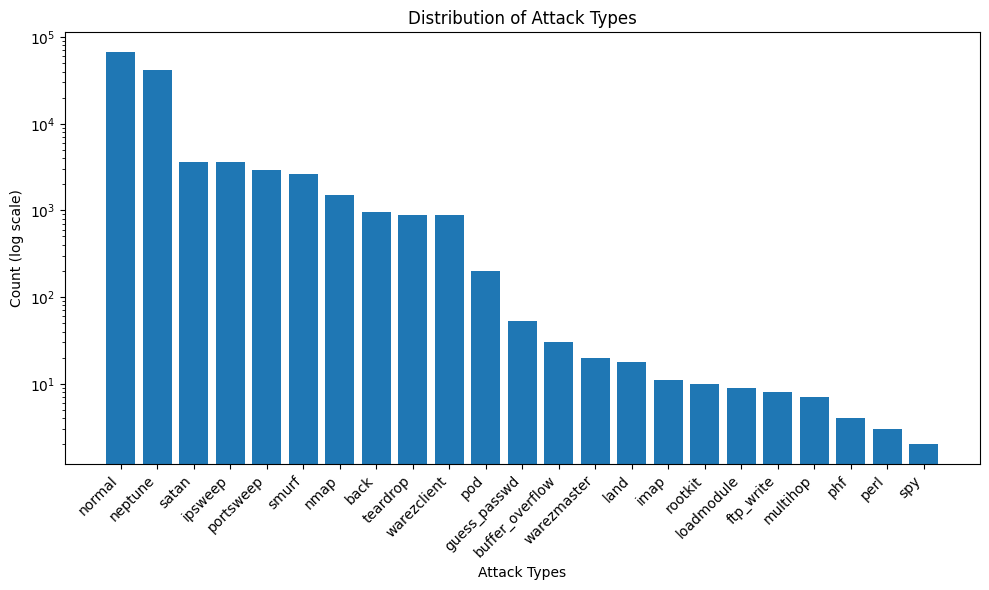

In [10]:
# Increase the size of the figures to make the bars and labels larger
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values)

plt.xlabel('Attack Types')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Attack Types')

# To improve visibility, rotate the x-axis labels.
plt.xticks(rotation=45, ha='right')  # 'ha' parameter aligns labels to the right

plt.yscale('log')  # Setting the y-axis to logarithmic scale

# Adjust spacing between x-axis labels
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin for x-axis labels
plt.tight_layout()

# Display the plot
plt.show()

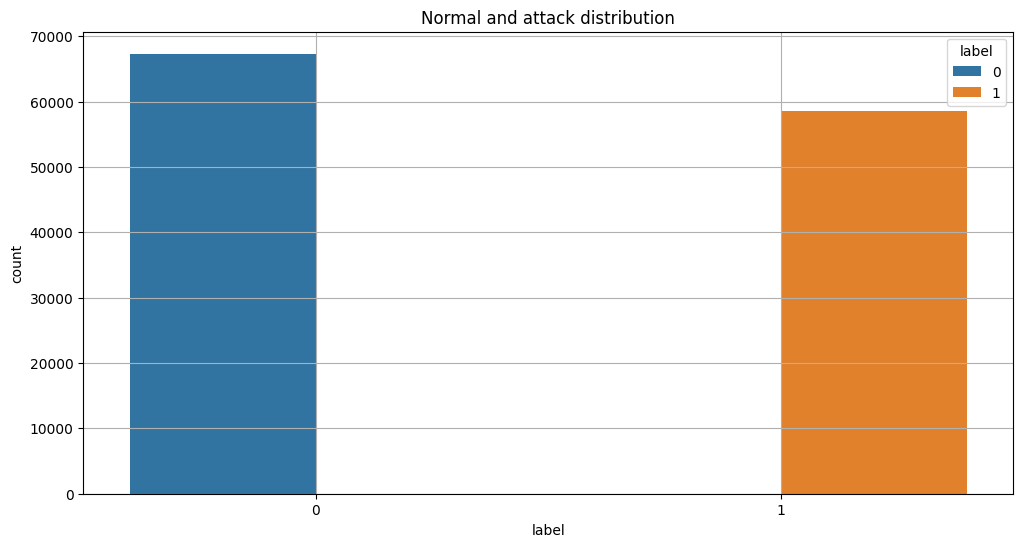

In [11]:
# Distribution plots for classes 1 and 0.
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = train_data , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()

In [12]:
# reading test data
test_data =  pd.read_table("KDDTest+.txt",sep = ',', names=fetaures_name)
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [13]:
#deleting an unnecessary feature 
test_data = test_data.iloc[:,:-1]
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [14]:
print("Shape of the test data",test_data.shape)
print("number of data points ",test_data.shape[0])
print("Number of feature ",train_data.shape[1])

Shape of the test data (22544, 42)
number of data points  22544
Number of feature  43


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [16]:
#stroing all the attack in the variable label    
label = test_data['attack'] 

# assigning all the attack to the outputs 0 and 1 
class_label = label.map(labeling)

#introducing a label column in the training data
test_data['label'] = class_label

print("shape of the test data",test_data.shape)
test_data.head(3)

shape of the test data (22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,0


In [17]:
value_counts = test_data['attack'].value_counts()
value_counts

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

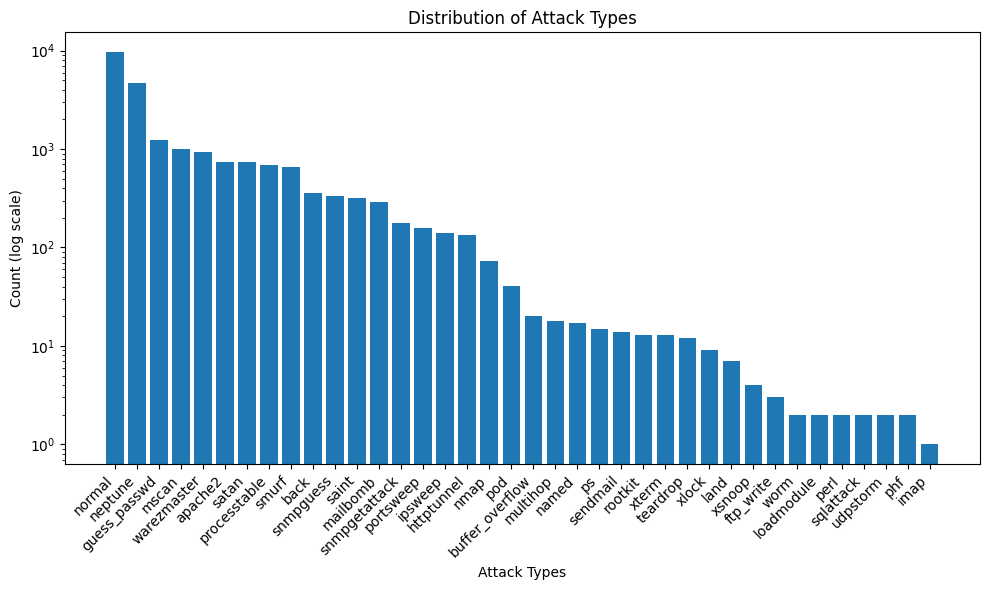

In [18]:
# Increase the size of the figures to make the bars and labels larger
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values)

plt.xlabel('Attack Types')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Attack Types')

# To improve visibility, rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # 'ha' parameter aligns labels to the right

plt.yscale('log')  # Setting the y-axis to logarithmic scale

# Adjust spacing between x-axis labels
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin for x-axis labels
plt.tight_layout()

# Display the plot
plt.show()

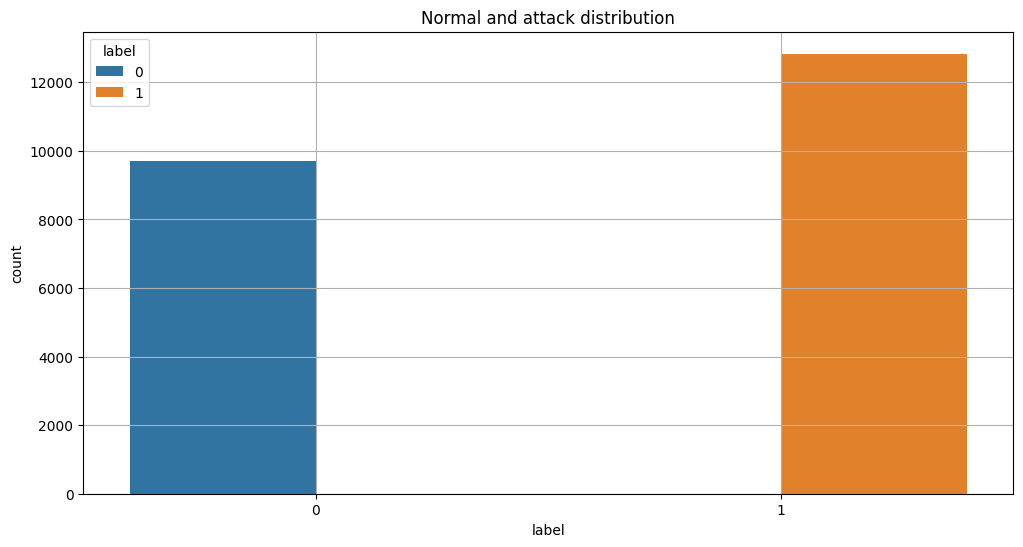

In [19]:
#distribution plot of class 0 and class 1
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = test_data , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()

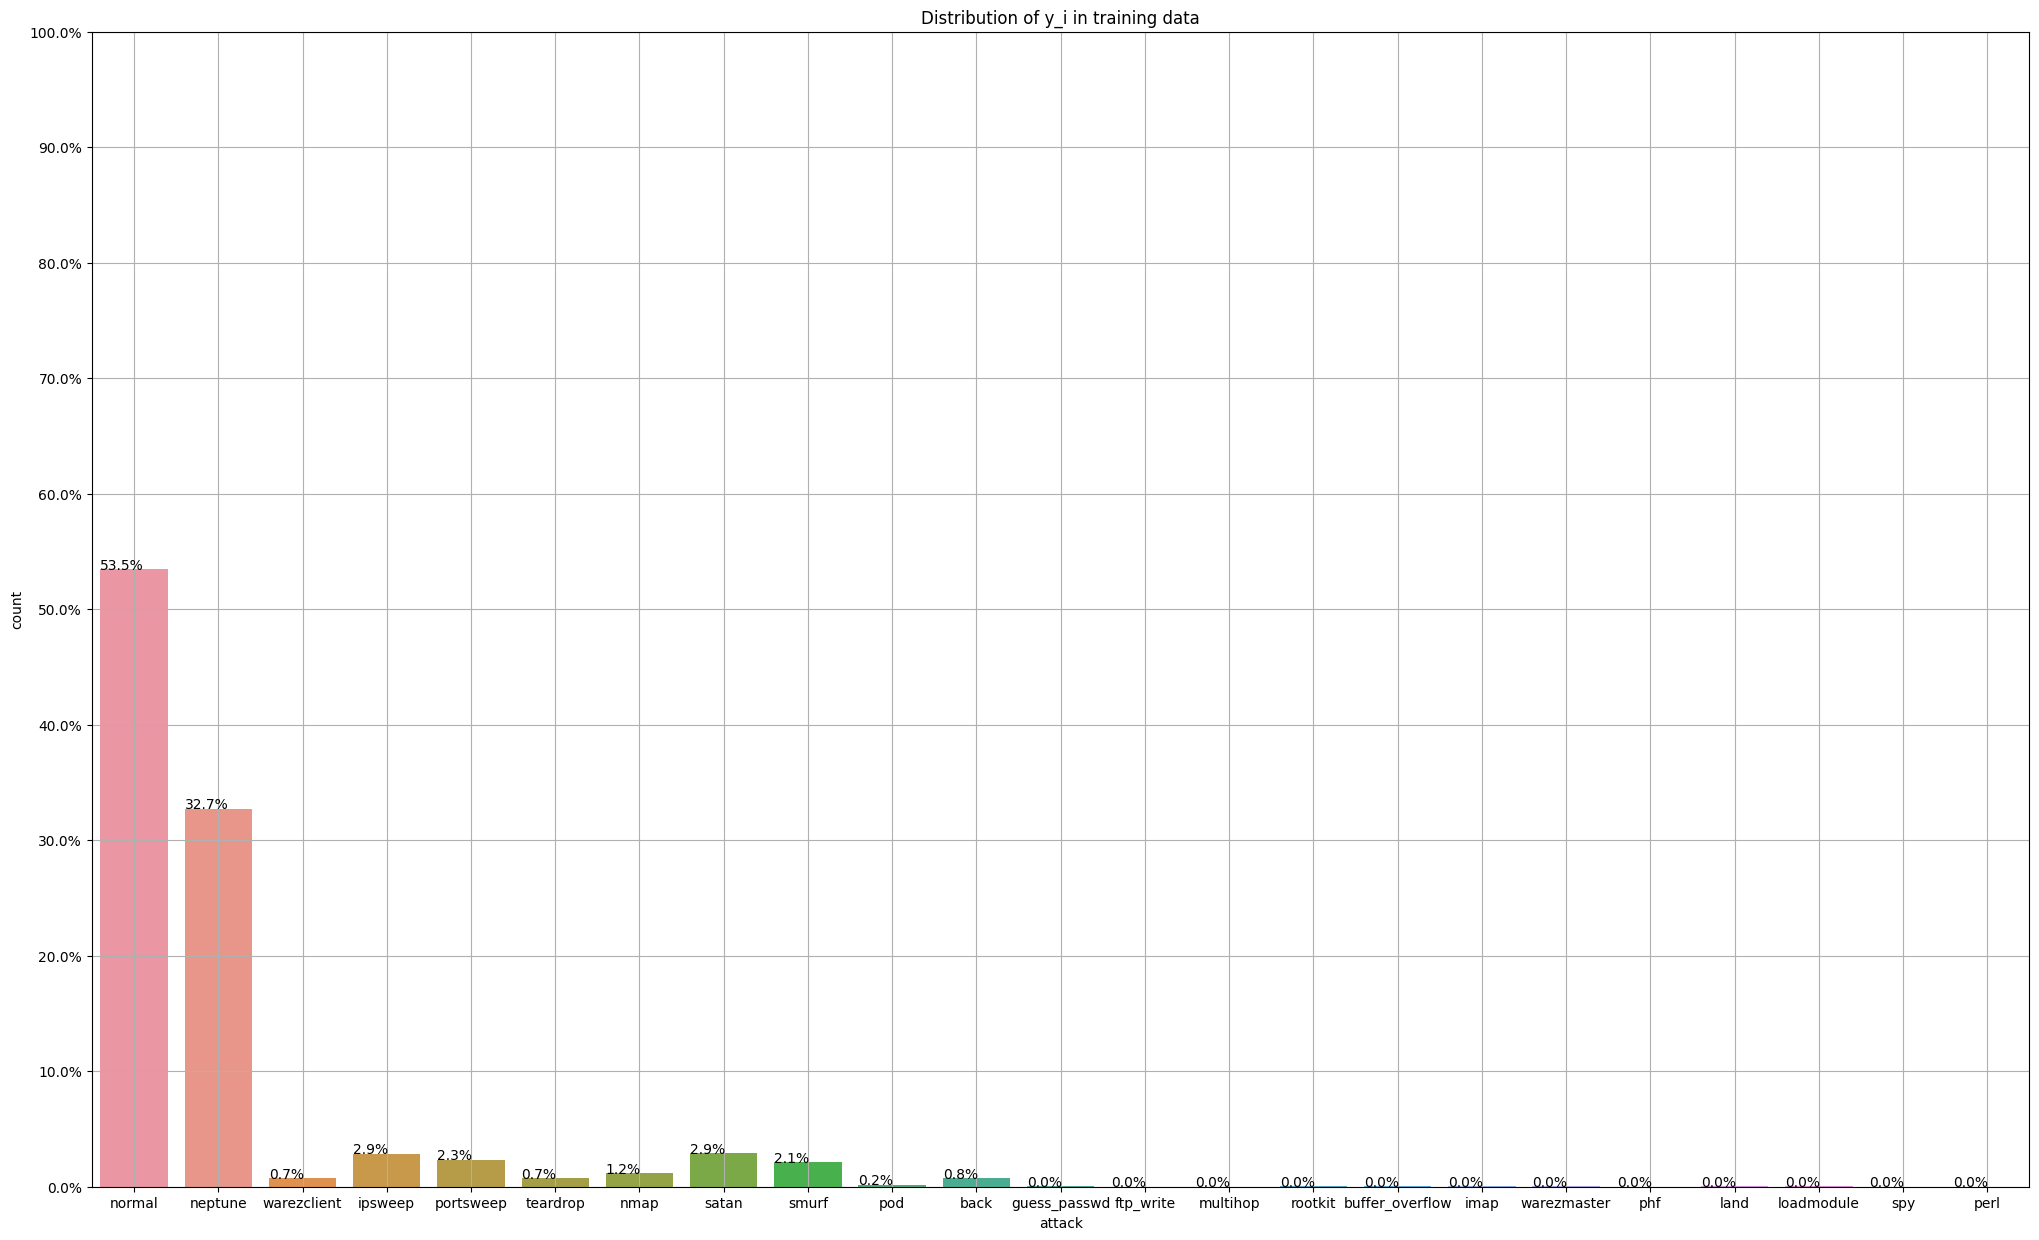

In [20]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(25,15))

# We will need the whole number of data to calculate the percentage later
total = len(train_data) * 1

# The code below will simply create a bar plot with attack(23 classes) as the X axis and count as the Y axis
ax = sns.countplot(x="attack", data=train_data)


#Each p patches (from the countplot) has a height (number of data points for a certain class) and a width
# p is passed to annotate(it is used to show text) and compute % of data in each class , give x coord and y coord of rectangle
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))


# intervals(11 interval) are set for datapoints 
ax.yaxis.set_ticks(np.linspace(0, total, 11))


# adjusting the format of the ticklabel without modifying the position of the ticks.
# map() need the function(what to do) and iterative
# below code : ax.yaxis.get_majorticklocs() - it will give 11 value from 0 to 125973 and we are dividing it with the total value which is 125973 after that we are getting 11 intervals with the percentile 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.title("Distribution of y_i in training data")
plt.grid()
plt.show()

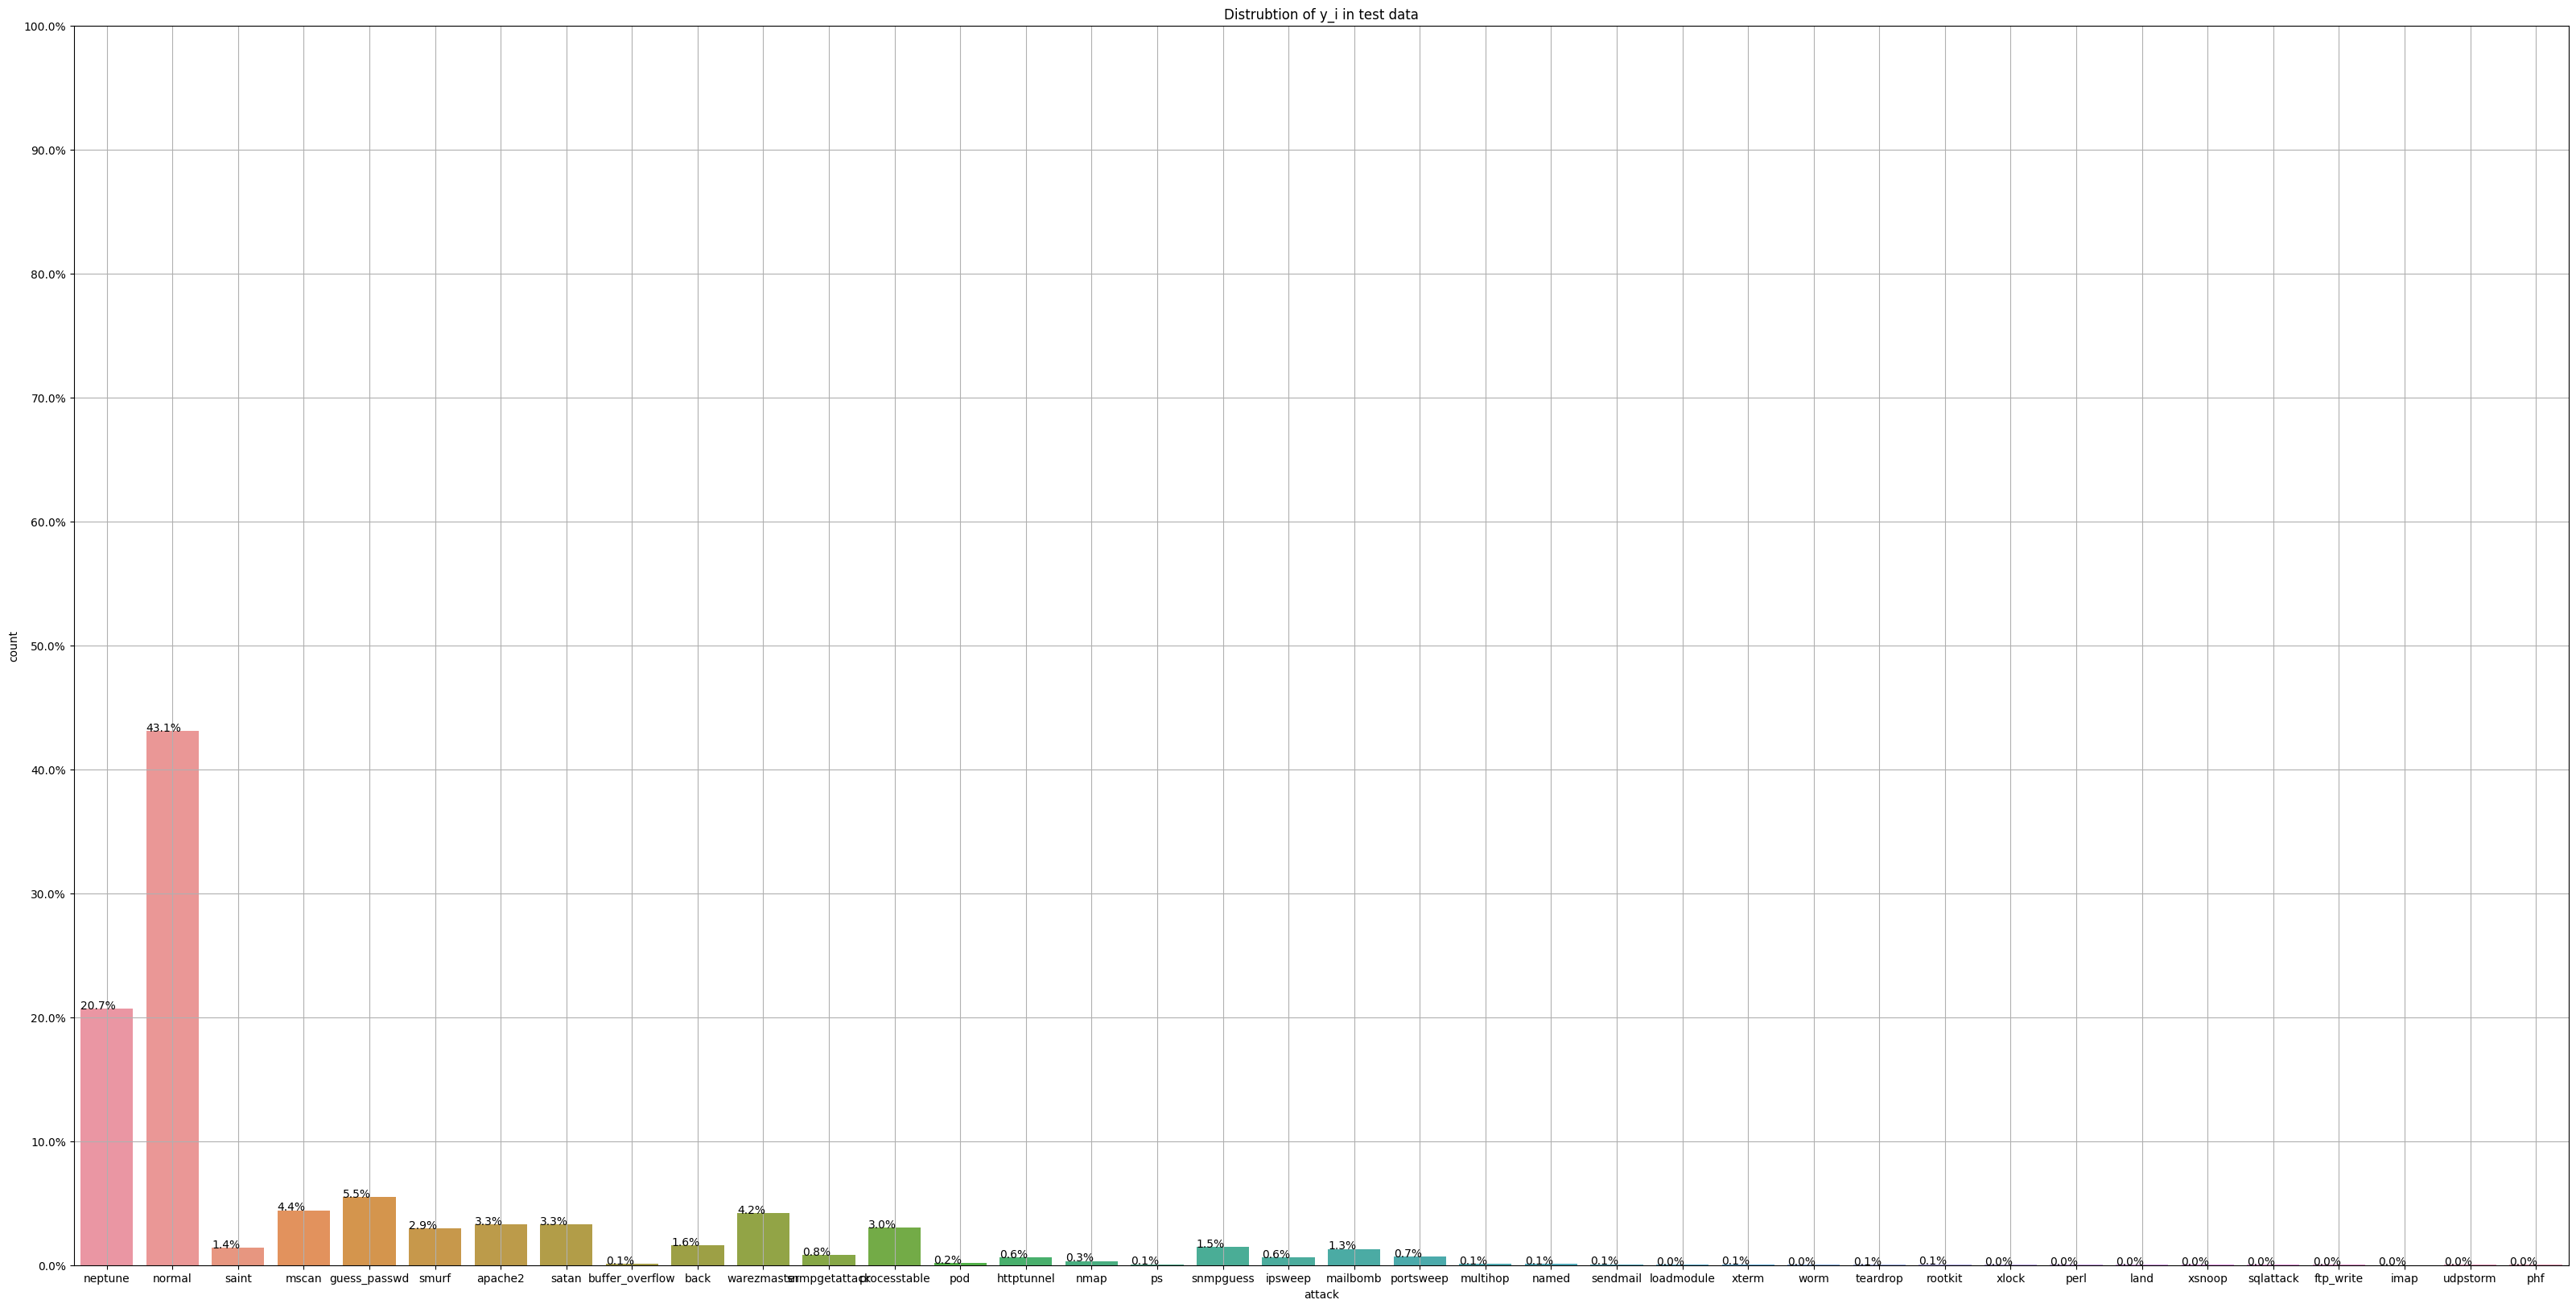

In [21]:
 #Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(40,20))

# we need the total number of data to find the percentage later.
total = len(test_data) * 1

# below code will simply plot bar plot where X axis is attack(23 classes) and y will simply count
ax = sns.countplot(x="attack", data= test_data )

# each p has height(number of data point for a given class ),width.
# then pass p to annotate(it is used to show text) and computing % of data in each class , give x coord and y coord of rectangle
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))

# put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

# adjust the ticklabel to the desired format, without changing the position of the ticks.
# map() need the function(what to do) and iterative
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.grid()
plt.title("Distrubtion of y_i in test data")
plt.show()

# Feature Selection

In [22]:
# defining y_train and y_test
y_train = train_data['label']
y_test  = test_data['label']

In [23]:
#Encoding the categorical data using label enocder
encoder = LabelEncoder()

# get the categorical features
cat_train = train_data.select_dtypes(include = 'object').copy()
cat_test = test_data.select_dtypes(include = 'object').copy()

cat_train_encode = cat_train.apply(encoder.fit_transform)
cat_test_encode = cat_test.apply(encoder.fit_transform)

# dropping attack feature
cat_train_encode = cat_train_encode.drop(['attack'],axis = 1)
cat_test_encode = cat_test_encode.drop(['attack'],axis = 1)

In [24]:
# shape of the encoded feature
print(cat_train_encode.shape)
print(cat_train_encode.shape)

(125973, 3)
(125973, 3)


In [25]:
# get all the numerical feature
num_train = train_data.select_dtypes(include = ['float64','int64'])
num_test = test_data.select_dtypes(include = ['float64','int64'])

# join numerical and categorical feature
features = pd.concat([num_train ,cat_train_encode],axis =1).columns
x_train_encode = np.concatenate((num_train , cat_train_encode),axis=1)
x_test_encode = np.concatenate((num_test , cat_test_encode),axis=1)

In [26]:
# shape after joining categorical and numerical features
print(x_train_encode.shape)
print(x_train_encode.shape)

(125973, 42)
(125973, 42)


In [27]:
# converting the joined feature into a dataframe
x_train_encoder = pd.DataFrame(x_train_encode ,columns = features)
x_test_encoder = pd.DataFrame(x_test_encode , columns = features)

# dropping the label class 
x_train_encoder = x_train_encoder.drop(['label'],axis = 1)
x_test_encoder = x_test_encoder.drop(['label'],axis = 1)

In [28]:
# shape after removing label
print(x_train_encoder.shape)
print(x_test_encoder.shape)

(125973, 41)
(22544, 41)


In [29]:
# this feature is useless as it has only contain zeros ,remove from dataframe
x_train_encoder = x_train_encoder.drop(['num_outbound_cmds'],axis = 1)
x_test_encoder = x_test_encoder.drop(['num_outbound_cmds'],axis = 1)

In [30]:
# print shape
print(x_train_encoder.shape)
print(x_test_encoder.shape)

(125973, 40)
(22544, 40)


In [31]:
# put correlated features into set , beacuse it will store only single feature not redundant
correlated_features = set()

# create a correlated feature of the train data
# it Compute pairwise correlation of columns, excluding NA/null values.
# by default "pearson correlation " 
# refer : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
correlation = x_train_encoder.corr()

#iterate through each column
for i in range(correlation.shape[0]):
    #iterate through ecah value of the given column
    for j in range(i):
        # give the i : column and j : vlaue in that column
        # if the value is > .8 remove them
        if abs(correlation.iloc[i,j]) > 0.8:
            # take that column which is >.8
            column = correlation.columns[i]
            # add it to the above set 
            correlated_features.add(column)

# print which are irrelavant features and how many them
print(correlated_features)
print(len(correlated_features))

{'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'num_root', 'is_guest_login', 'srv_rerror_rate', 'srv_serror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate'}
9


In [32]:
# droppin the irrelevant feature
x_train_encoder = x_train_encoder.drop(['is_guest_login', 'dst_host_srv_rerror_rate', 'srv_serror_rate', 'num_root', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate'],axis=1)

In [33]:
# shape after dropping the irrelevant fetaures
x_train_encoder.shape

(125973, 31)

In [34]:
# create a randomforest classifer (why :  beacuse random forest tend to work well on feature importance)
rfc = RandomForestClassifier(random_state=101)

# put the object of randomforest into the recursive feature elemination using cross validation
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
rfecv.fit(x_train_encoder, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='roc_auc')

In [35]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 31


1                       src_bytes
2                       dst_bytes
30                           flag
20                  same_srv_rate
21                  diff_srv_rate
8                       logged_in
24             dst_host_srv_count
29                        service
18                    serror_rate
28                  protocol_type
16                          count
25         dst_host_diff_srv_rate
26    dst_host_same_src_port_rate
27    dst_host_srv_diff_host_rate
23                 dst_host_count
17                      srv_count
6                             hot
19                    rerror_rate
9                 num_compromised
0                        duration
22             srv_diff_host_rate
4                  wrong_fragment
12             num_file_creations
7               num_failed_logins
10                     root_shell
14               num_access_files
3                            land
13                     num_shells
11                   su_attempted
5             

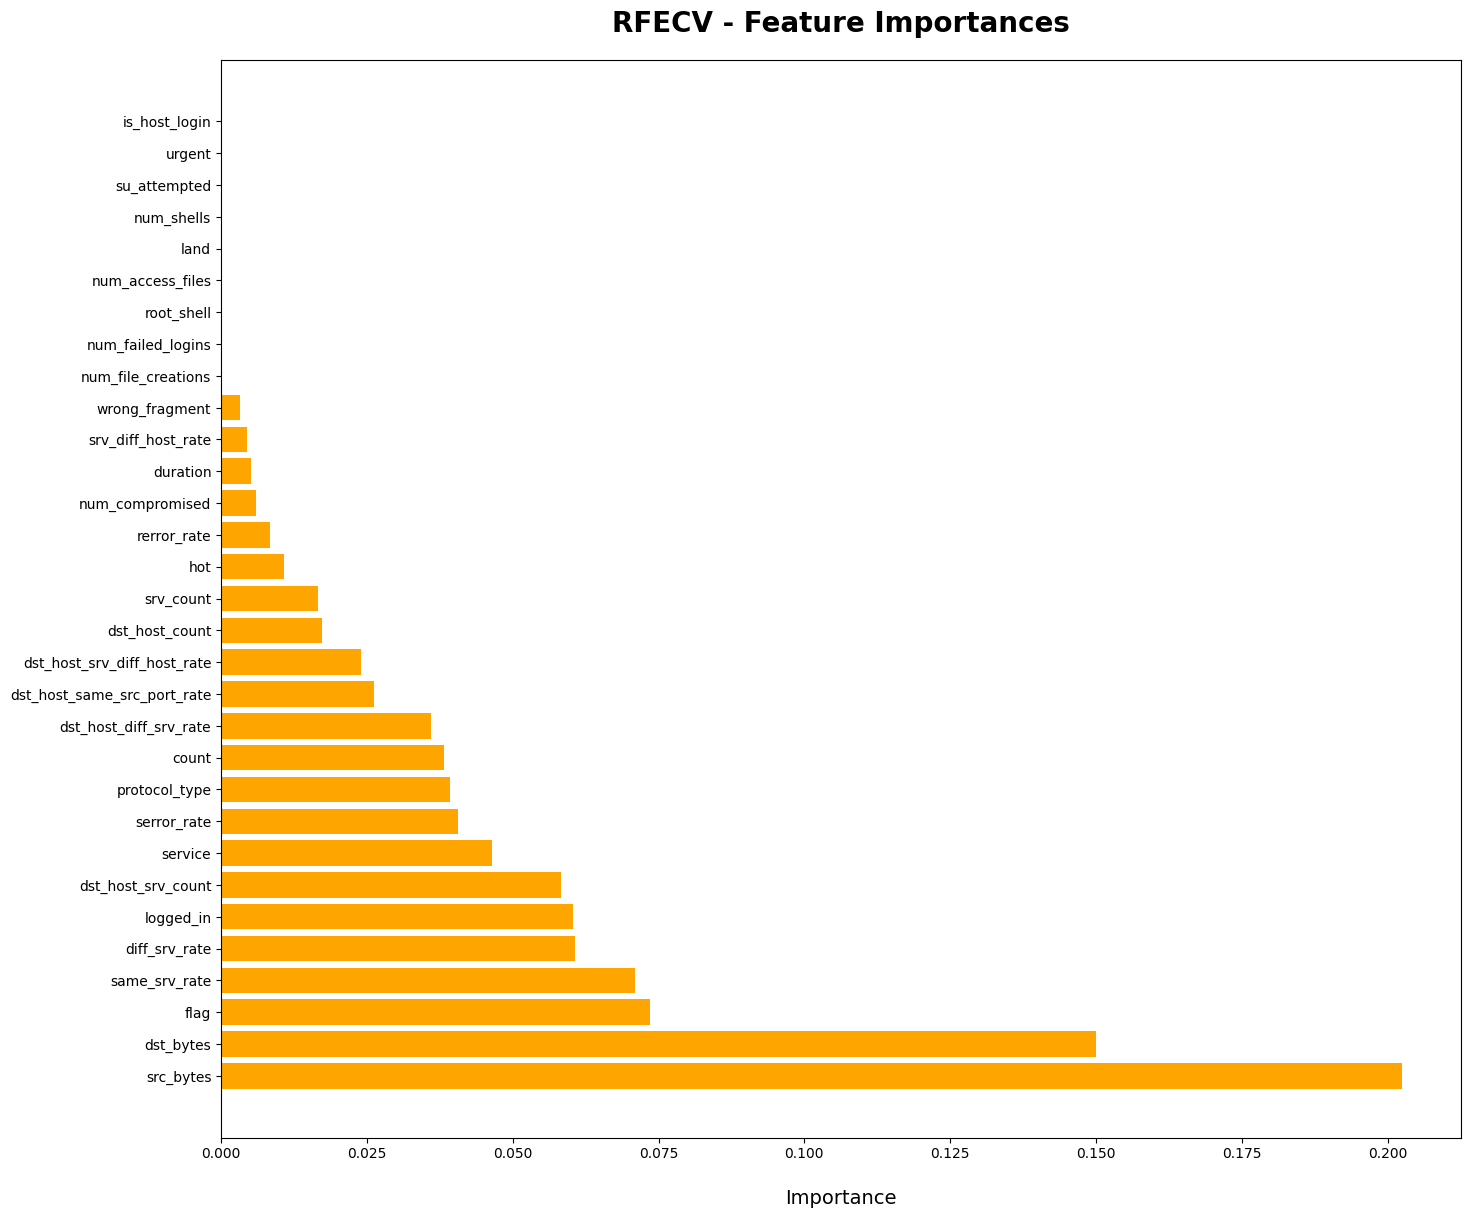

In [36]:
dset = pd.DataFrame()
dset['attr'] = x_train_encoder.columns

dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)
print(dset.attr)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='orange')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [34]:
# removing correlated features/irrelevant features from train data 
X_train_after_FS = train_data.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)
X_test_after_FS = test_data.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)

In [35]:
# shape after removing correlated features/irrelevant features from traing data
print(X_train_after_FS.shape )
print(X_test_after_FS.shape )

(125973, 34)
(22544, 34)


In [36]:
# removing featues which are adding less value , by looking at the RFECV
X_train_after_FS = X_train_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1)
X_test_after_FS = X_test_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1)

In [37]:
# shape after removing above features
print(X_train_after_FS.shape )
print(X_test_after_FS.shape )

(125973, 23)
(22544, 23)


In [38]:
# removing label, attck,protocol_type,service,flag column from train and test data
X_train_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)
X_test_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)

print(X_train_after_FS.shape)
print(X_train_after_FS.shape)

(125973, 19)
(125973, 19)


# One-hot Encoding

In [57]:
prototype_vectorizer = CountVectorizer()
train_protocol_type_encoding = prototype_vectorizer.fit_transform(train_data['protocol_type'])
test_protocol_type_encoding = prototype_vectorizer.transform(test_data['protocol_type'])

In [58]:
service_encode = CountVectorizer()
train_service_encoding = service_encode.fit_transform(train_data['service'])
test_service_encoding = service_encode.transform(test_data['service'])

In [59]:
flag_encoding = CountVectorizer()
train_flag_encoding = flag_encoding.fit_transform(train_data['flag'])
test_flag_encoding = flag_encoding.transform(test_data['flag'])

In [60]:
# take protocol_type one_hot_encoding vector and service one_hot_encoding vector and merge them using hstack
train_protocol_service_encoding = hstack((train_protocol_type_encoding, train_service_encoding))
test_protocol_service_encoding = hstack((test_protocol_type_encoding,  test_service_encoding))

# take train_proto_services_encoding vector and flag one_hot_encoding vector and merge them using hstack
train_protocol_service_flag_encoding = hstack((train_protocol_service_encoding, train_flag_encoding))
test_protocol_service_flag_encoding  = hstack((test_protocol_service_encoding ,test_flag_encoding))

# merging the categorical onehot encoded feature and numerical feature
X_train = hstack((train_protocol_service_flag_encoding , X_train_after_FS))
X_test = hstack((test_protocol_service_flag_encoding , X_test_after_FS))

# Standardisation

In [43]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean = False)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [44]:
print("Shape of the training data after mergeing - datapoints : ",X_train.shape[0],"features : ",X_train.shape[1],  " and y_train :",y_train.shape[0])
print("Shape of the test data after mergeing - datapoints : ",X_test.shape[0],"features : ",X_test.shape[1]," and y_test : ",y_test.shape[0])

Shape of the training data after mergeing - datapoints :  125973 features :  103  and y_train : 125973
Shape of the test data after mergeing - datapoints :  22544 features :  103  and y_test :  22544


# ML Model

In [45]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
  
    B =(C/C.sum(axis=0))
   
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("Orange")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [46]:
DT = DTC(class_weight={0:.1,1:15}, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

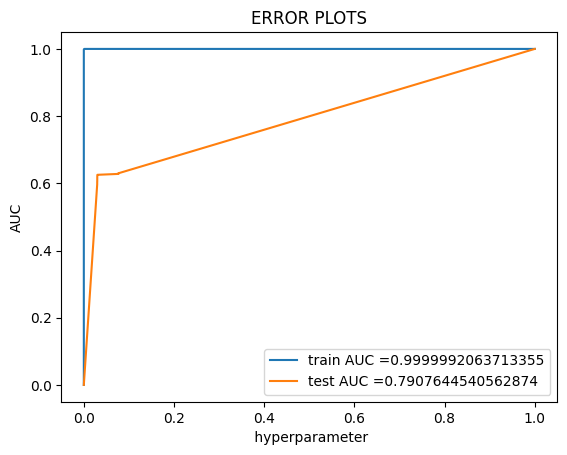

In [47]:
DT.fit(X_train , y_train)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value       
train_fpr, train_tpr, thresholds = roc_curve(y_train, DT.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [48]:
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

# Metrics

In [49]:
print('Train Accuracy', accuracy_score(y_train,y_train_pred))
print('Test Accuracy', accuracy_score(y_test,y_test_pred))

Train Accuracy 0.9991982408928898
Test Accuracy 0.7562100780695529


In [50]:
print('Train Precision',precision_score(y_train,y_train_pred))
print('Test Precision',precision_score(y_test,y_test_pred))

Train Precision 0.9982802949038838
Test Precision 0.9153175591531756


In [51]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9991394074692616
Test f1 score 0.7463306563278871


In [52]:
print('Train recall score',recall_score(y_train,y_train_pred))
print('Train recall score',recall_score(y_test,y_test_pred))

Train recall score 1.0
Train recall score 0.6300163640614042


# Confusion Matrices

Train confusion_matrix


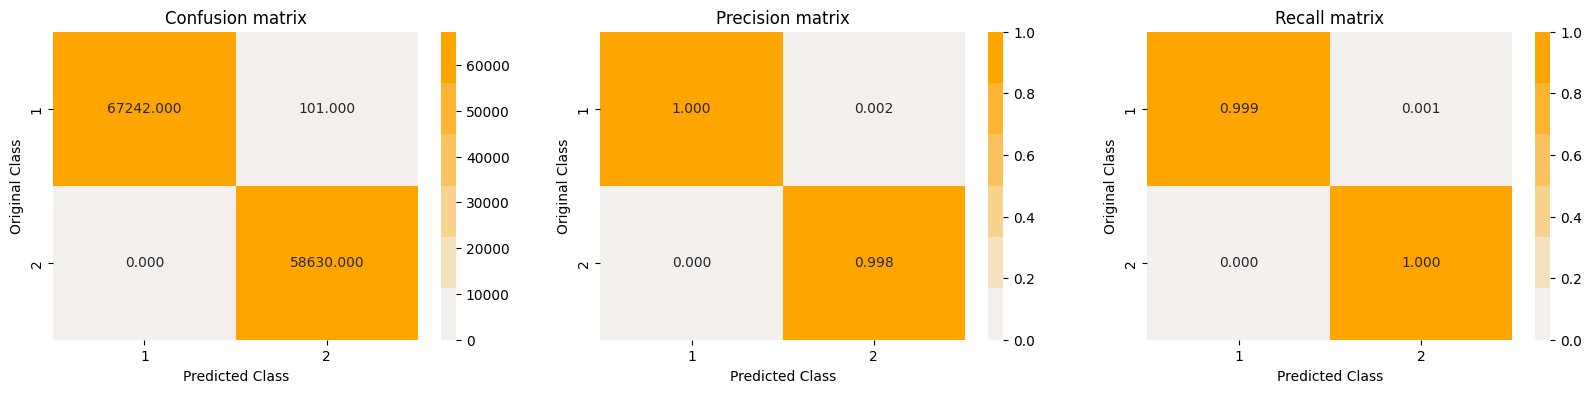

Test confusion_matrix


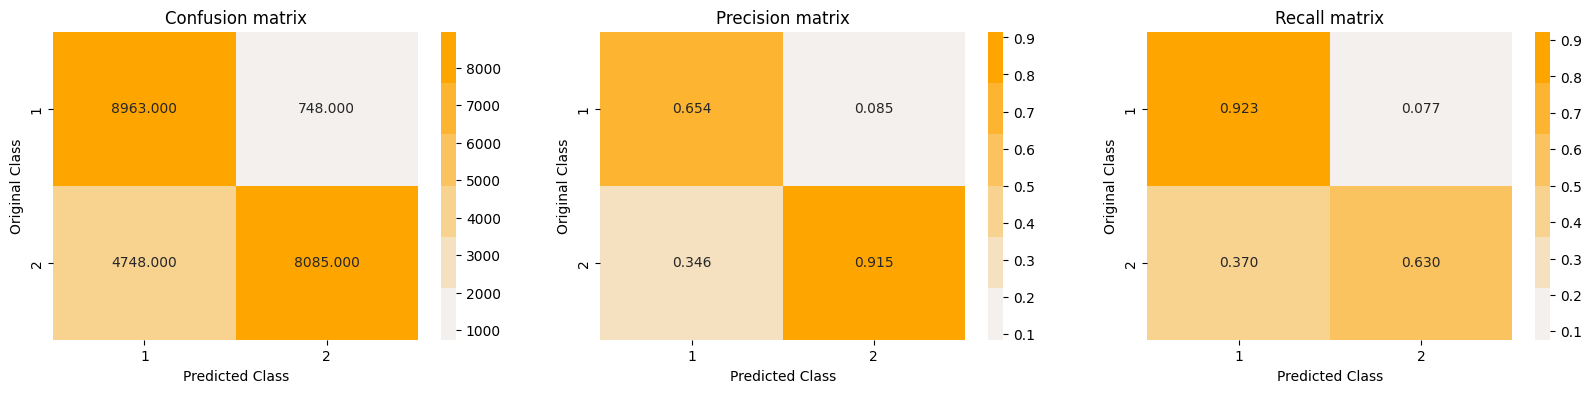

In [53]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

# Simulation Test

In [54]:
data =  pd.read_table("simData.csv",sep = ',', names=fetaures_name)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,NaN,NaN
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,NaN,NaN
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,NaN,NaN
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,NaN,NaN
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,NaN,NaN


In [61]:
protocol_type_encoding = prototype_vectorizer.transform(data['protocol_type'])
service_encoding = service_encode.transform(data['service'])
flag_encoding = flag_encoding.transform(data['flag'])

protocol_service_encoding = hstack((protocol_type_encoding,  test_service_encoding))
protocol_service_flag_encoding  = hstack((test_protocol_service_encoding,test_flag_encoding))

X_Sim = hstack((protocol_service_flag_encoding , X_test_after_FS))

In [62]:
prediction = DT.predict(X_Sim)

print('Train Accuracy', accuracy_score(y_test,prediction))
print('Train Precision',precision_score(y_test, prediction))
print('Train f1 score',f1_score(y_test,prediction))
print('Train recall score',recall_score(y_test,prediction))

Train Accuracy 0.781139105748758
Train Precision 0.9204726924305334
Train f1 score 0.7780077386844237
Train recall score 0.673731785241175
